## Notebook to examine decision-length and readability in court decisions

Ciation: Sean Rehaag, "Notebook to examine word count and readability in court decisions" (2025), online: <https://github.com/a2aj-ca/canadian-legal-data/example-projects/readability.ipynb>.

### Setup: Install Packages

In [1]:
# !pip install datasets
# !pip install pandas
# !pip install textstat

### Example 1: Readability in Tax Court of Canada decisions

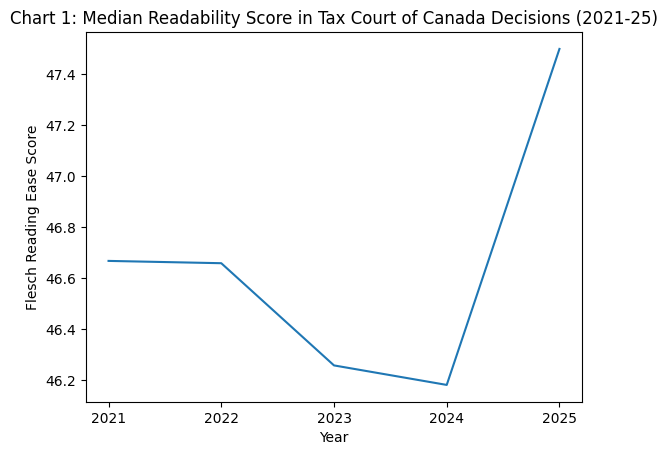

In [43]:
# load packages
from datasets import load_dataset
import pandas as pd
import matplotlib.pyplot as plt
import textstat

# load dataset
laws = load_dataset("a2aj/canadian-case-law", data_dir="TCC", split="train")
df = laws.to_pandas()

# chart median readability by year, line chart, 2021 to 2025
df = df[df["document_date_en"].dt.year.between(2021, 2025)]
df['readability'] = df['unofficial_text_en'].apply(lambda x: textstat.flesch_reading_ease(x) if pd.notna(x) else None)
df.groupby(df["document_date_en"].dt.year)["readability"].median().plot(kind="line")

# format chart
plt.title("Chart 1: Median Readability Score in Tax Court of Canada Decisions (2021-25)")
plt.xlabel("Year")
plt.ylabel("Flesch Reading Ease Score")
plt.xticks([2021, 2022, 2023, 2024, 2025])
plt.show()

plt.show()


### Example 2: Word Counts in Federal Court Immigration Judicial Reviews

In [2]:
# import packages
from datasets import load_dataset
import pandas as pd
import re

# load dataset
laws = load_dataset("a2aj/canadian-case-law", data_dir="FC", split="train")
df = laws.to_pandas()

# drop rows where no English decision
df = df.dropna(subset=['unofficial_text_en'])

# drop rows where document_date is before 2021-01-01 or after 2025-12-31
df = df[df['document_date_en'].between('2021-01-01', '2025-12-31')]

# keep only rows that are immigration files, based on IMM Docket number format 
# (IMM-#(up to 5)-##(2))
df = df[df['unofficial_text_en'].str.contains(r'IMM-\d{1,5}-\d{2}', na=False)]

# extract judge
judge_name_pattern = r'(?:\r\n|\r|\n)PRESENT:[\s\t]+(.*?)(?:\r\n|\r|\n|$)'
df['judge'] = df['unofficial_text_en'].apply(
    lambda x: re.search(judge_name_pattern, x, re.IGNORECASE).group(1).strip() 
    if re.search(judge_name_pattern, x, re.IGNORECASE) else '')

# Clean Judges names
def clean_name(name):
    name = name.upper().strip().replace("’", "'").replace("Ѐ", "È")
    name = name.replace("THE CHIEF JUSTICE", "CRAMPTON")
    name = name.split()[-1] if name else ''
    return name.strip()

df['judge'] = df['judge'].apply(clean_name)

# get word counts
df['word_count'] = df['unofficial_text_en'].str.split().str.len()

# limit to judges with at least 50 IMM cases
df = df[df['judge'].map(df['judge'].value_counts()) >= 50]

# table with median word counts, and number of decisions, sorted by median
summary_table = df.groupby('judge').agg(
    median_word_count=('word_count', 'median'),
    num_decisions=('word_count', 'size')
).sort_values('median_word_count')

summary_table


,median_word_count,num_decisions
judge,,
HENEGHAN,805.5,190
BATTISTA,1190.0,70
GRAMMOND,1212.5,102
SADREHASHEMI,1563.0,201
MCDONALD,1910.5,104
FOTHERGILL,1989.0,78
NOWAK,2059.0,59
ROUSSEL,2073.0,61
FUHRER,2078.0,139
